# Generating Fiber Samples

This program will take a sample target from the given COSMOS mosaic tile and smooth the object.
It will smooth as a function of the FWHM that is inputted.
Then it will graph the smoothed object and overplot the Mini-IFUs onto the smoothed target

#### Please Note that plotting in python has y axis starting from the top down

# Getting Set-up

First we need to be in the proper directory

In [37]:
cd /Users/RichardP/Research/FOBOS/py_FOBOS/

/Users/RichardP/research/fobos/py_FOBOS


Now we need to add all the package dependencies.

In [38]:
import numpy as np
from astropy.io import fits
from astropy import wcs
import matplotlib.pyplot as plt
import scipy.ndimage.filters as ndimage
#This is the specific code
import gen_spec

Now we will upload the specific ACS Mosaic Tile fits file 

We wll also input the catalog information for all the objects in the COSMOS field

In [39]:
gen = gen_spec.gen_spectra('/Users/RichardP/Research/FOBOS/Samples/acs_I_030mas_088_sci.fits')
gen.catalog_info('/Users/RichardP/Research/FOBOS/Samples/photoz_vers2.0_010312_UltraVISTA2016.fits')

# Un-Smoothed

Now that we're all set we can begin to learn more about the data. 

First, we are going to look for a specific object with IMAG between 23 - 24.

In [40]:
def sample_index():
    for i in range(0, 10):
        if gen.objects_Imag[i] > 23 and gen.objects_Imag[i] < 24:
            print(str(gen.objects_id[i]) + "_" + str(i) + ": " + str(gen.objects_Imag[i]))
sample_index()


1423982_2: 23.93
1424243_8: 23.836
1424298_9: 23.664


The format of this is the "Id of the objects" + "The index of object in the whole list of targets". So it looks like index 2 with 23.93 Imag is a good fit. We will set that value to variable target_index which we will use later on. Now we want to graph the image to sanity check the object looks legit. We will also graph the overplotted Mini-IFUs where the blue circle is IFU0. IFU 1 is the orange fraction and it goes clockwise.

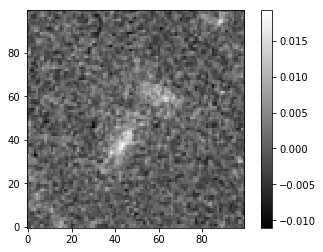

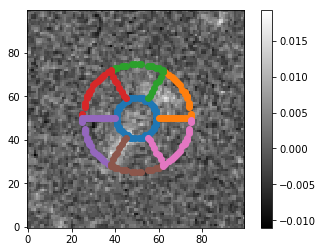

In [5]:
gen.target_index = 2
gen.target_image(gen.scidata)
gen.graph_image(gen.box_image)
gen.border_plot()
gen.overplot_image(gen.box_image)

At first glance it looks like there is some object/galaxy there. However, The center of the galaxy seems fainter than the remnants so we'd be better off picking another. Number 9 with Imag 23. looks like a good choice.

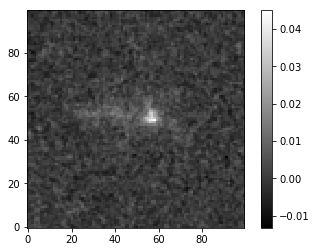

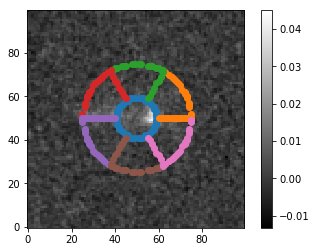

In [6]:
gen.target_index = 13
gen.target_image(gen.scidata)
gen.graph_image(gen.box_image)
gen.border_plot()
gen.overplot_image(gen.box_image)

There looks to be a central galaxy with little evidence of remnants. This will help later one when we smooth the image to account for seeing. For now we want to grab some general information about the object such as the the RA and DEC and pixel (x,y) coordinates.

In [7]:
print(str(gen.objects_id[gen.target_index]) + "_RA: " + str(gen.objects_RA[gen.target_index]))
print(str(gen.objects_id[gen.target_index]) + "_DEC: " + str(gen.objects_DEC[gen.target_index]))
print(str(gen.objects_id[gen.target_index]) + "_XCoord: " + str(gen.x_coords[gen.target_index]))
print(str(gen.objects_id[gen.target_index]) + "_YCoord: " + str(gen.y_coords[gen.target_index]))

1424429_RA: 150.3
1424429_DEC: 2.58574
1424429_XCoord: 11583
1424429_YCoord: 15379


Now that we have the X,Y we want to create Mini-IFU plots to integrate our flux over. We'll double check that the first couple of pixels are right around the center of the plot. 

In [8]:
gen.overplotting()
for i in range(0, 5):
    print(str(gen.objects_id[gen.target_index]) + "_(X,Y)" + str(i) + ": (" + str(gen.fiber0_xcoords[
        gen.target_index * 293 + i]) + "," + str(gen.fiber0_ycoords[gen.target_index * 293 + i]) + ")")


1424429_(X,Y)0: (11583,15379)
1424429_(X,Y)1: (11584,15380)
1424429_(X,Y)2: (11585,15380)
1424429_(X,Y)3: (11586,15380)
1424429_(X,Y)4: (11587,15380)


The inner Mini-IFU has 293 pixels in total which is why I use 293. It looks as though the points are definitely around our target object. Now we're going to inspect the flux values of each Mini-IFU.

In [9]:
gen.Flux_Sum()
def print_flux_sum():
    print("Mini-IFU0_Flux_" + str(gen.objects_id[gen.target_index]) + ": " + str(gen.IFU_flux0[gen.target_index]))
    print("Mini-IFU1_Flux_" + str(gen.objects_id[gen.target_index]) + ": " + str(gen.IFU_flux1[gen.target_index]))
    print("Mini-IFU2_Flux_" + str(gen.objects_id[gen.target_index]) + ": " + str(gen.IFU_flux2[gen.target_index]))
    print("Mini-IFU3_Flux_" + str(gen.objects_id[gen.target_index]) + ": " + str(gen.IFU_flux3[gen.target_index]))
    print("Mini-IFU4_Flux_" + str(gen.objects_id[gen.target_index]) + ": " + str(gen.IFU_flux4[gen.target_index]))
    print("Mini-IFU5_Flux_" + str(gen.objects_id[gen.target_index]) + ": " + str(gen.IFU_flux5[gen.target_index]))
    print("Mini-IFU6_Flux_" + str(gen.objects_id[gen.target_index]) + ": " + str(gen.IFU_flux6[gen.target_index]))
print_flux_sum()

Mini-IFU0_Flux_1424429: 2.66456816904
Mini-IFU1_Flux_1424429: 0.708077073479
Mini-IFU2_Flux_1424429: 0.279187362843
Mini-IFU3_Flux_1424429: 1.07339699397
Mini-IFU4_Flux_1424429: 0.508124921365
Mini-IFU5_Flux_1424429: 0.116998990294
Mini-IFU6_Flux_1424429: 0.625805928462


These values are accurate in relation to the Mini-IFU overplot with purple and brown fractions being IFU 4 and 5. These two Mini-IFUs seem brighter than the rest and as a result the flux values are higher.  We will now integrate the flux really quickly.

In [10]:
gen.int_flux()
def print_Int_Flux():
    print("Int_Flux_" + str(gen.objects_id[gen.target_index]) + ": " + str(gen.IFU_sum[gen.target_index]))
print_Int_Flux()

Int_Flux_1424429: 5.976159439451749


The catalog originally gave the values of the objects in magnitude and the relevant one is Imag since ACS uses the I-Band. We want to convert the integrated flux  and Mini-IFU flux values to ABMag just to look at. This value will be off by some factor because the catalog integrated over 3 arcseconds. 

In [11]:
gen.ABMAG_Convert(gen.IFU_sum)
def print_IFU_Convert():
    for i in range(0,7):
        input = ( "self.IFU_flux" + str(i))
        gen.ABMAG_Convert(input)
        print(str(gen.objects_id[gen.target_index]) + "_IMag: " + str(gen.ABMAG_list[gen.target_index]))
print_IFU_Convert()

1424429_IMag: 22.8359329112
1424429_IMag: 24.274798668
1424429_IMag: 25.2852606089
1424429_IMag: 23.8230990632
1424429_IMag: 24.6350737607
1424429_IMag: 26.2295447155
1424429_IMag: 24.4089008174


/Users/RichardP/research/fobos/py_FOBOS/gen_spec.py:347: RuntimeWarning: invalid value encountered in log10
  ABMAG =  ((-2.5 * np.log10(FluxVals[i])) +23.9)


For the 4th and 5th Imag values you notice that it is significantly lower than 1, 2, 3, and 6 which verifies that those fibers were indeed higher in counts. 

We know that Flux and Imag have a certain relationship that can be shown on a graph. We will now graph Flux vs. Imag and also Calculated Imag vs Objects_Imag. This way we see if our conversions are correct for the most part. 

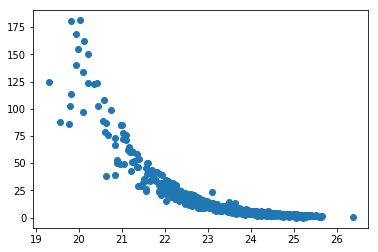

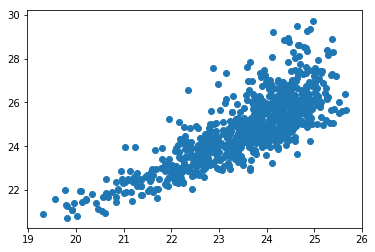

In [12]:
plt.scatter(gen.objects_Imag, gen.IFU_sum)
plt.show(1)
plt.scatter(gen.objects_Imag, gen.ABMAG_list)
plt.show(2)

The relation between Objects_Imag and Flux seems somewhat apparent. The Objects_Imag and the calculated Imag seems less linear as we'd hope. However, the relationship is very strong at small Objects_Imag and tails off as Imag gets greater which may be due to fainter objects being harder to observe and record. 

###### Smoothed

We will now look at the smoothed data. 

First we will smooth the data in general. We will first specify smoothing with a FWHM of .5 arcseconds.

In [13]:
FWHM = .5
gen.smooth(FWHM)
gen.smoothing(FWHM)

Now we will plot the image to sanity check that the image is the same and does indeed look smoothed

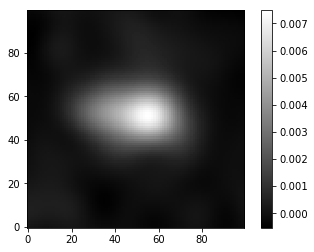

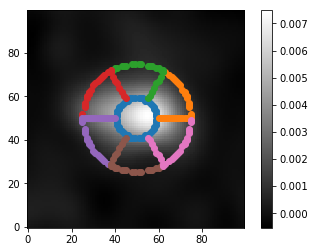

In [14]:
gen.graph_image(gen.box_image)
gen.overplot_image(gen.box_image)

The smoothing process looks okay so far, but let us pull up the information gathered about the objects such as Flux values.

In [15]:
def smooth_flux():
    print(str(gen.fwhm) + "_Smoothed_IFU_Flux0_" + str(gen.objects_id[gen.target_index]) + ": " +  str(gen.smoothed_IFU_flux0[gen.target_index]))
    print(str(gen.fwhm) + "_Smoothed_IFU_Flux1_" + str(gen.objects_id[gen.target_index]) + ": " +  str(gen.smoothed_IFU_flux1[gen.target_index]))
    print(str(gen.fwhm) + "_Smoothed_IFU_Flux2_" + str(gen.objects_id[gen.target_index]) + ": " +  str(gen.smoothed_IFU_flux2[gen.target_index]))
    print(str(gen.fwhm) + "_Smoothed_IFU_Flux3_" + str(gen.objects_id[gen.target_index]) + ": " +  str(gen.smoothed_IFU_flux3[gen.target_index]))
    print(str(gen.fwhm) + "_Smoothed_IFU_Flux4_" + str(gen.objects_id[gen.target_index]) + ": " +  str(gen.smoothed_IFU_flux4[gen.target_index]))
    print(str(gen.fwhm) + "_Smoothed_IFU_Flux5_" + str(gen.objects_id[gen.target_index]) + ": " +  str(gen.smoothed_IFU_flux5[gen.target_index]))
    print(str(gen.fwhm) + "_Smoothed_IFU_Flux6_" + str(gen.objects_id[gen.target_index]) + ": " +  str(gen.smoothed_IFU_flux6[gen.target_index]))
    print(str(gen.fwhm) + "_Smoothed_IFU_sum_" + str(gen.objects_id[gen.target_index]) + ": " +  str(gen.smoothed_IFU_sum[gen.target_index]))
smooth_flux()

0.5_Smoothed_IFU_Flux0_1424429: 2.6270239055156708
0.5_Smoothed_IFU_Flux1_1424429: 0.7001752860469423
0.5_Smoothed_IFU_Flux2_1424429: 0.2808639996521265
0.5_Smoothed_IFU_Flux3_1424429: 1.0552042520430405
0.5_Smoothed_IFU_Flux4_1424429: 0.4861601462981753
0.5_Smoothed_IFU_Flux5_1424429: 0.14719046282152703
0.5_Smoothed_IFU_Flux6_1424429: 0.5986001655977589
0.5_Smoothed_IFU_sum_1424429: 5.895218217975241


For this object the smoothing made the integrated flux greater because the object was already so narrowly focused when it was un-smoothed. 

We will now convert the flux into Imags.

In [16]:
gen.ABMAG_Convert(gen.smoothed_IFU_sum)
def print_Smooth_Convert():
    for i in range(0,7):
        input = ("self.smoothed_IFU_flux" + str(i))
        gen.ABMAG_Convert(input)
        print(str(gen.objects_id[gen.target_index]) + "_IMag: " + str(gen.ABMAG_list[gen.target_index]))
print_Smooth_Convert()

1424429_IMag: 22.851339938
1424429_IMag: 24.2869830563
1424429_IMag: 25.2787598097
1424429_IMag: 23.8416586686
1424429_IMag: 24.6830516149
1424429_IMag: 25.9803008228
1424429_IMag: 24.4571579184


/Users/RichardP/research/fobos/py_FOBOS/gen_spec.py:347: RuntimeWarning: invalid value encountered in log10
  ABMAG =  ((-2.5 * np.log10(FluxVals[i])) +23.9)


As expected there was marginal difference adn the values were aligned with what we got before.

We expect seeing to vary from .5 - 1.5 for good observation runs. We will vary the FWHM by .25 arcsecond intervals to track the difference in calculations and images.

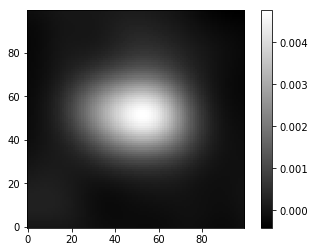

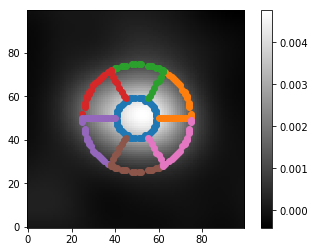

In [17]:
FWHM = .75
gen.smooth(FWHM)
gen.smoothing(FWHM)
gen.graph_image(gen.box_image)
gen.overplot_image(gen.box_image)

In [18]:
smooth_flux()

0.75_Smoothed_IFU_Flux0_1424429: 2.604505439288914
0.75_Smoothed_IFU_Flux1_1424429: 0.6966700417688116
0.75_Smoothed_IFU_Flux2_1424429: 0.28333723762625596
0.75_Smoothed_IFU_Flux3_1424429: 1.043441392830573
0.75_Smoothed_IFU_Flux4_1424429: 0.4762646770614083
0.75_Smoothed_IFU_Flux5_1424429: 0.1623569521252648
0.75_Smoothed_IFU_Flux6_1424429: 0.5896152660852749
0.75_Smoothed_IFU_sum_1424429: 5.856191006786503


In [19]:
gen.ABMAG_Convert(gen.smoothed_IFU_sum)
print_Smooth_Convert()

1424429_IMag: 22.8606868281
1424429_IMag: 24.2924321615
1424429_IMag: 25.2692408613
1424429_IMag: 23.8538298475
1424429_IMag: 24.7053790686
1424429_IMag: 25.8738227754
1424429_IMag: 24.4735782011


/Users/RichardP/research/fobos/py_FOBOS/gen_spec.py:347: RuntimeWarning: invalid value encountered in log10
  ABMAG =  ((-2.5 * np.log10(FluxVals[i])) +23.9)


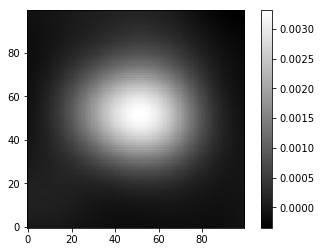

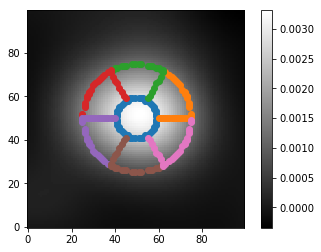

In [20]:
FWHM = 1
gen.smooth(FWHM)
gen.smoothing(FWHM)
gen.graph_image(gen.box_image)
gen.overplot_image(gen.box_image)

In [21]:
smooth_flux()

1_Smoothed_IFU_Flux0_1424429: 2.583347757346928
1_Smoothed_IFU_Flux1_1424429: 0.6934881971101277
1_Smoothed_IFU_Flux2_1424429: 0.2870571670027857
1_Smoothed_IFU_Flux3_1424429: 1.0304166140267625
1_Smoothed_IFU_Flux4_1424429: 0.46777770984624567
1_Smoothed_IFU_Flux5_1424429: 0.17602070012105742
1_Smoothed_IFU_Flux6_1424429: 0.5828803684903505
1_Smoothed_IFU_sum_1424429: 5.820988513944258


In [22]:
gen.ABMAG_Convert(gen.smoothed_IFU_sum)
print_Smooth_Convert()

1424429_IMag: 22.8695428184
1424429_IMag: 24.2974023151
1424429_IMag: 25.2550790139
1424429_IMag: 23.8674678688
1424429_IMag: 24.7249011917
1424429_IMag: 25.7860906398
1424429_IMag: 24.4860514289


/Users/RichardP/research/fobos/py_FOBOS/gen_spec.py:347: RuntimeWarning: invalid value encountered in log10
  ABMAG =  ((-2.5 * np.log10(FluxVals[i])) +23.9)


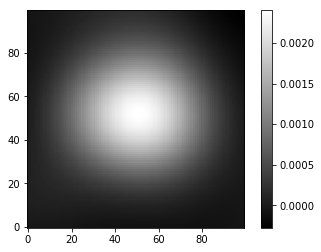

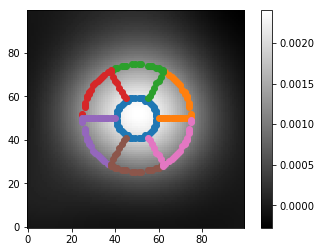

In [23]:
FWHM = 1.25
gen.smooth(FWHM)
gen.smoothing(FWHM)
gen.graph_image(gen.box_image)
gen.overplot_image(gen.box_image)

In [24]:
smooth_flux()

1.25_Smoothed_IFU_Flux0_1424429: 2.563987406902015
1.25_Smoothed_IFU_Flux1_1424429: 0.6910752202384174
1.25_Smoothed_IFU_Flux2_1424429: 0.2915641620252245
1.25_Smoothed_IFU_Flux3_1424429: 1.0164312577107921
1.25_Smoothed_IFU_Flux4_1424429: 0.4603756334327045
1.25_Smoothed_IFU_Flux5_1424429: 0.18845215671399274
1.25_Smoothed_IFU_Flux6_1424429: 0.5775229646237676
1.25_Smoothed_IFU_sum_1424429: 5.789408801646914


In [25]:
gen.ABMAG_Convert(gen.smoothed_IFU_sum)
print_Smooth_Convert()

1424429_IMag: 22.8777102805
1424429_IMag: 24.3011866979
1424429_IMag: 25.2381646473
1424429_IMag: 23.8823049695
1424429_IMag: 24.7422191765
1424429_IMag: 25.7119972199
1424429_IMag: 24.4960768545


/Users/RichardP/research/fobos/py_FOBOS/gen_spec.py:347: RuntimeWarning: invalid value encountered in log10
  ABMAG =  ((-2.5 * np.log10(FluxVals[i])) +23.9)


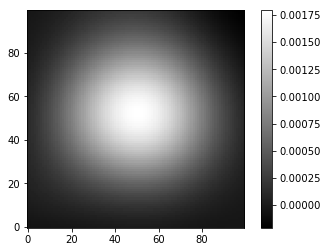

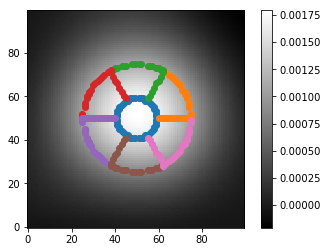

In [26]:
FWHM = 1.5
gen.smooth(FWHM)
gen.smoothing(FWHM)
gen.graph_image(gen.box_image)
gen.overplot_image(gen.box_image)

In [27]:
smooth_flux()

1.5_Smoothed_IFU_Flux0_1424429: 2.5465997522696853
1.5_Smoothed_IFU_Flux1_1424429: 0.6894476700108498
1.5_Smoothed_IFU_Flux2_1424429: 0.2963983195950277
1.5_Smoothed_IFU_Flux3_1424429: 1.0021297087077983
1.5_Smoothed_IFU_Flux4_1424429: 0.4536317055026302
1.5_Smoothed_IFU_Flux5_1424429: 0.200156208178214
1.5_Smoothed_IFU_Flux6_1424429: 0.5728864994307514
1.5_Smoothed_IFU_sum_1424429: 5.761249863694957


In [28]:
gen.ABMAG_Convert(gen.smoothed_IFU_sum)
print_Smooth_Convert()

1424429_IMag: 22.8850982688
1424429_IMag: 24.3037467294
1424429_IMag: 25.2203106572
1424429_IMag: 23.8976901569
1424429_IMag: 24.7582414977
1424429_IMag: 25.6465773375
1424429_IMag: 24.5048285304


/Users/RichardP/research/fobos/py_FOBOS/gen_spec.py:347: RuntimeWarning: invalid value encountered in log10
  ABMAG =  ((-2.5 * np.log10(FluxVals[i])) +23.9)


# Creating Magnitude Objects

We know the code works so we will continue on to the spectra simulator. To do this we will need to smooth 71 objects with Imag beween 23-24 and find the magnitude of each mini-ifu flux. 

In [29]:
FWHM = .7
gen.target_index = 1
gen.smooth(FWHM)
Mag0 = []
Mag1 = []
Mag2 = []
Mag3 = []
Mag4 = []
Mag5 = []
Mag6 = []
for i in range(0,71):
    gen.target_index = target_indexes[i]
    gen.ABMAG_Convert(gen.smoothed_IFU_flux0)
    Mag0.append(gen.ABMAG_list[gen.target_index])
for i in range(0,71):
    gen.target_index = target_indexes[i]
    gen.ABMAG_Convert(gen.smoothed_IFU_flux1)
    Mag1.append(gen.ABMAG_list[gen.target_index])
for i in range(0,71):
    gen.target_index = target_indexes[i]
    gen.ABMAG_Convert(gen.smoothed_IFU_flux2)
    Mag2.append(gen.ABMAG_list[gen.target_index])
for i in range(0,71):
    gen.target_index = target_indexes[i]
    gen.ABMAG_Convert(gen.smoothed_IFU_flux3)
    Mag3.append(gen.ABMAG_list[gen.target_index])
for i in range(0,71):
    gen.target_index = target_indexes[i]
    gen.ABMAG_Convert(gen.smoothed_IFU_flux4)
    Mag4.append(gen.ABMAG_list[gen.target_index])
for i in range(0,71):
    gen.target_index = target_indexes[i]
    gen.ABMAG_Convert(gen.smoothed_IFU_flux5)
    Mag5.append(gen.ABMAG_list[gen.target_index])
for i in range(0,71):
    gen.target_index = target_indexes[i]
    gen.ABMAG_Convert(gen.smoothed_IFU_flux6)
    Mag6.append(gen.ABMAG_list[gen.target_index])

/Users/RichardP/research/fobos/py_FOBOS/gen_spec.py:347: RuntimeWarning: invalid value encountered in log10
  ABMAG =  ((-2.5 * np.log10(FluxVals[i])) +23.9)


In [30]:
print(len(Mag0))
print(len(Mag1))
print(len(Mag2))
print(len(Mag3))
print(len(Mag4))
print(len(Mag5))
print(len(Mag6))

71
71
71
71
71
71
71


Sanity check we have 71 magnitudes for each Mini-IFU totaling to 497 total "fibers. We will now begin to incorporate specsim.

In [31]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [32]:
import astropy.units as u
from astropy.coordinates import SkyCoord
import numpy as np

In [33]:
import specsim.simulator

We want to generate 71 spectra each with 7 fibers. This is to represent 7 Mini-IFUs multiplied by 71 total objects. We will assume that the redshift of these objects are random between redshift 2 and redshift 3 so we can differentiate between spectra. 

In [34]:
fobos = {}
for i in range(0,71):
    desi = specsim.simulator.Simulator('/users/richardp/desi/code/specsim/specsim/data/config/desi.yaml', num_fibers=7)
    rand_int = round(random.uniform(2.0, 3.0), 3)
    desi.source.update_in("qso_z0", "perfect", desi.source.wavelength_in, desi.source.flux_in, z_in=0)
    desi.source.update_out(z_out = rand_int, filter_name = "sdss2010-i", ab_magnitude_out = 23)
    desi.simulate()
    fobos[str(i).format(i)] = desi

/Users/RichardP/anaconda3/envs/desi/lib/python3.5/site-packages/astropy/table/column.py:1096: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  ma.MaskedArray.__setitem__(self, index, value)


Here we will plot a couple of spectra to sanity check that we generated different redshift spectra.

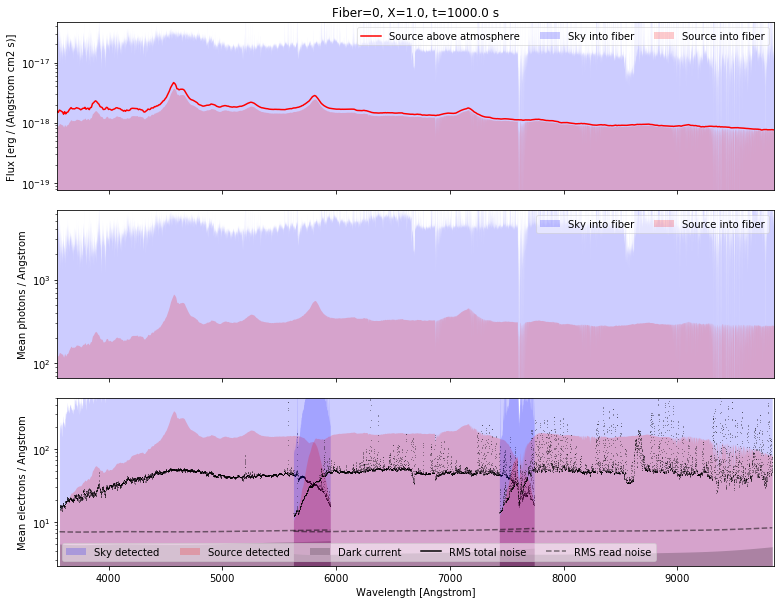

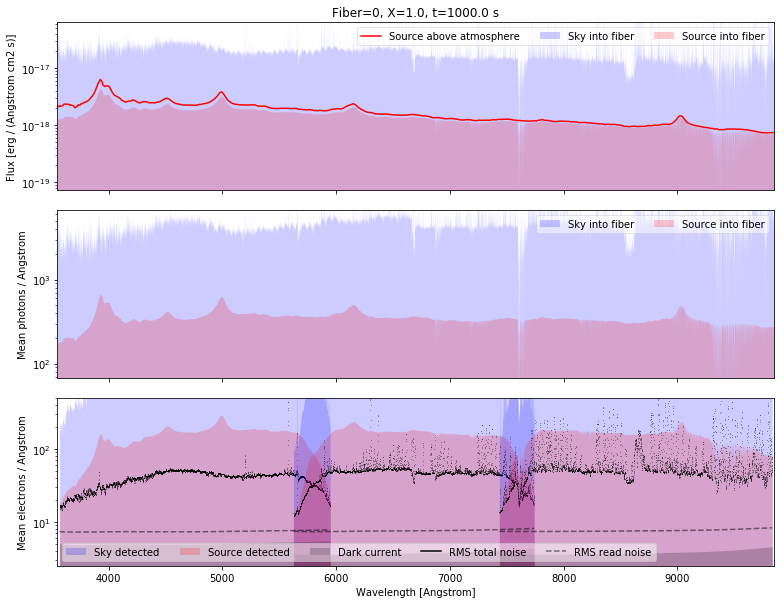

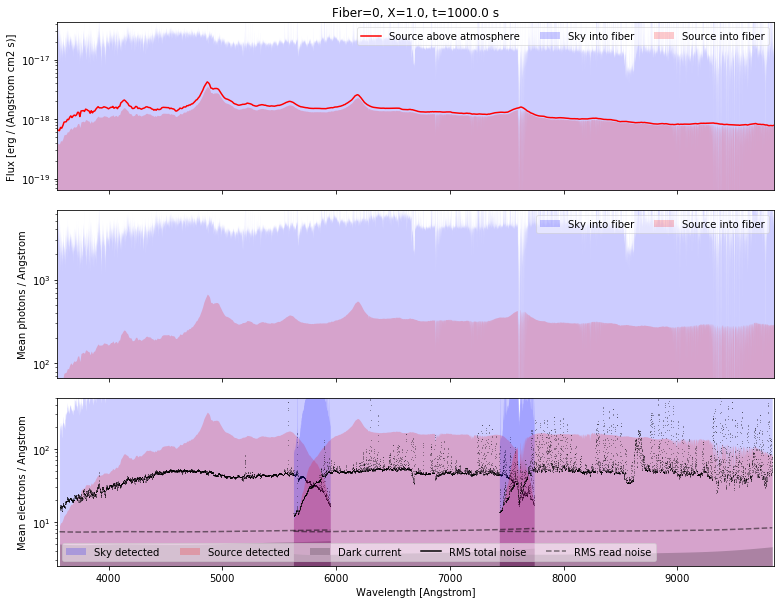

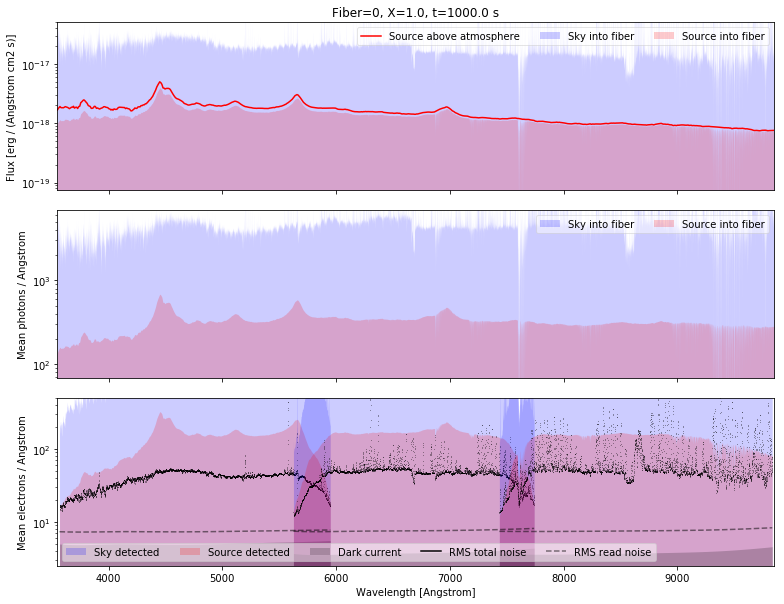

In [35]:
fobos['0'].plot()
fobos['20'].plot()
fobos['32'].plot()
fobos['63'].plot()

As you can see the spectra are all shifted slightly differently verifying the random redshift.